In [380]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import scipy.stats as stt
import scipy.integrate as integ
import pandas as pd
import seaborn as sbn
rnd.seed = 1234

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)

/var/folders/bq/c0v_5_v15yv4wrwpv0d4mc1r0000gn/T/ipykernel_19938/78204469.py:12: RuntimeWarning: divide by zero encountered in divide
  axes.errorbar(data[1][1:] - binw/2, data[0], 1/np.sqrt(data[0]),alpha=0.5, fmt='.', color='blue', capsize=4, markersize=10)


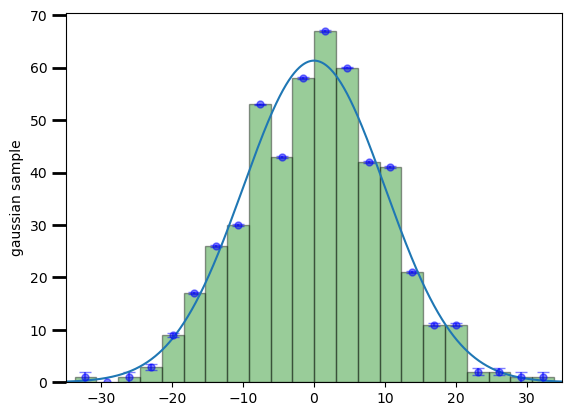

In [387]:
mu = 0
sigma = 10
N = 500
binN = int(np.sqrt(N))
#x = rnd.normal(mu, sigma, N)
x = stt.norm.rvs(loc=mu, scale=sigma, size=N)
X = np.arange(-35, 35, 0.05)

fig, axes = plt.subplots(1)
data = axes.hist(x,bins = binN, color='green', alpha=0.4, edgecolor='black')
binw = (max(data[1]) - min(data[1]))/binN
axes.errorbar(data[1][1:] - binw/2, data[0], 1/np.sqrt(data[0]),alpha=0.5, fmt='.', color='blue', capsize=4, markersize=10)
axes.plot(X, N*binw*stt.norm.pdf(X, mu, sigma))
axes.set_xlim(-35, 35)
axes.set_ylabel("gaussian sample")
axes.tick_params(axis='y', which='major', length=10, width=2)
axes.tick_params(axis='y', which='minor', length=0)

* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

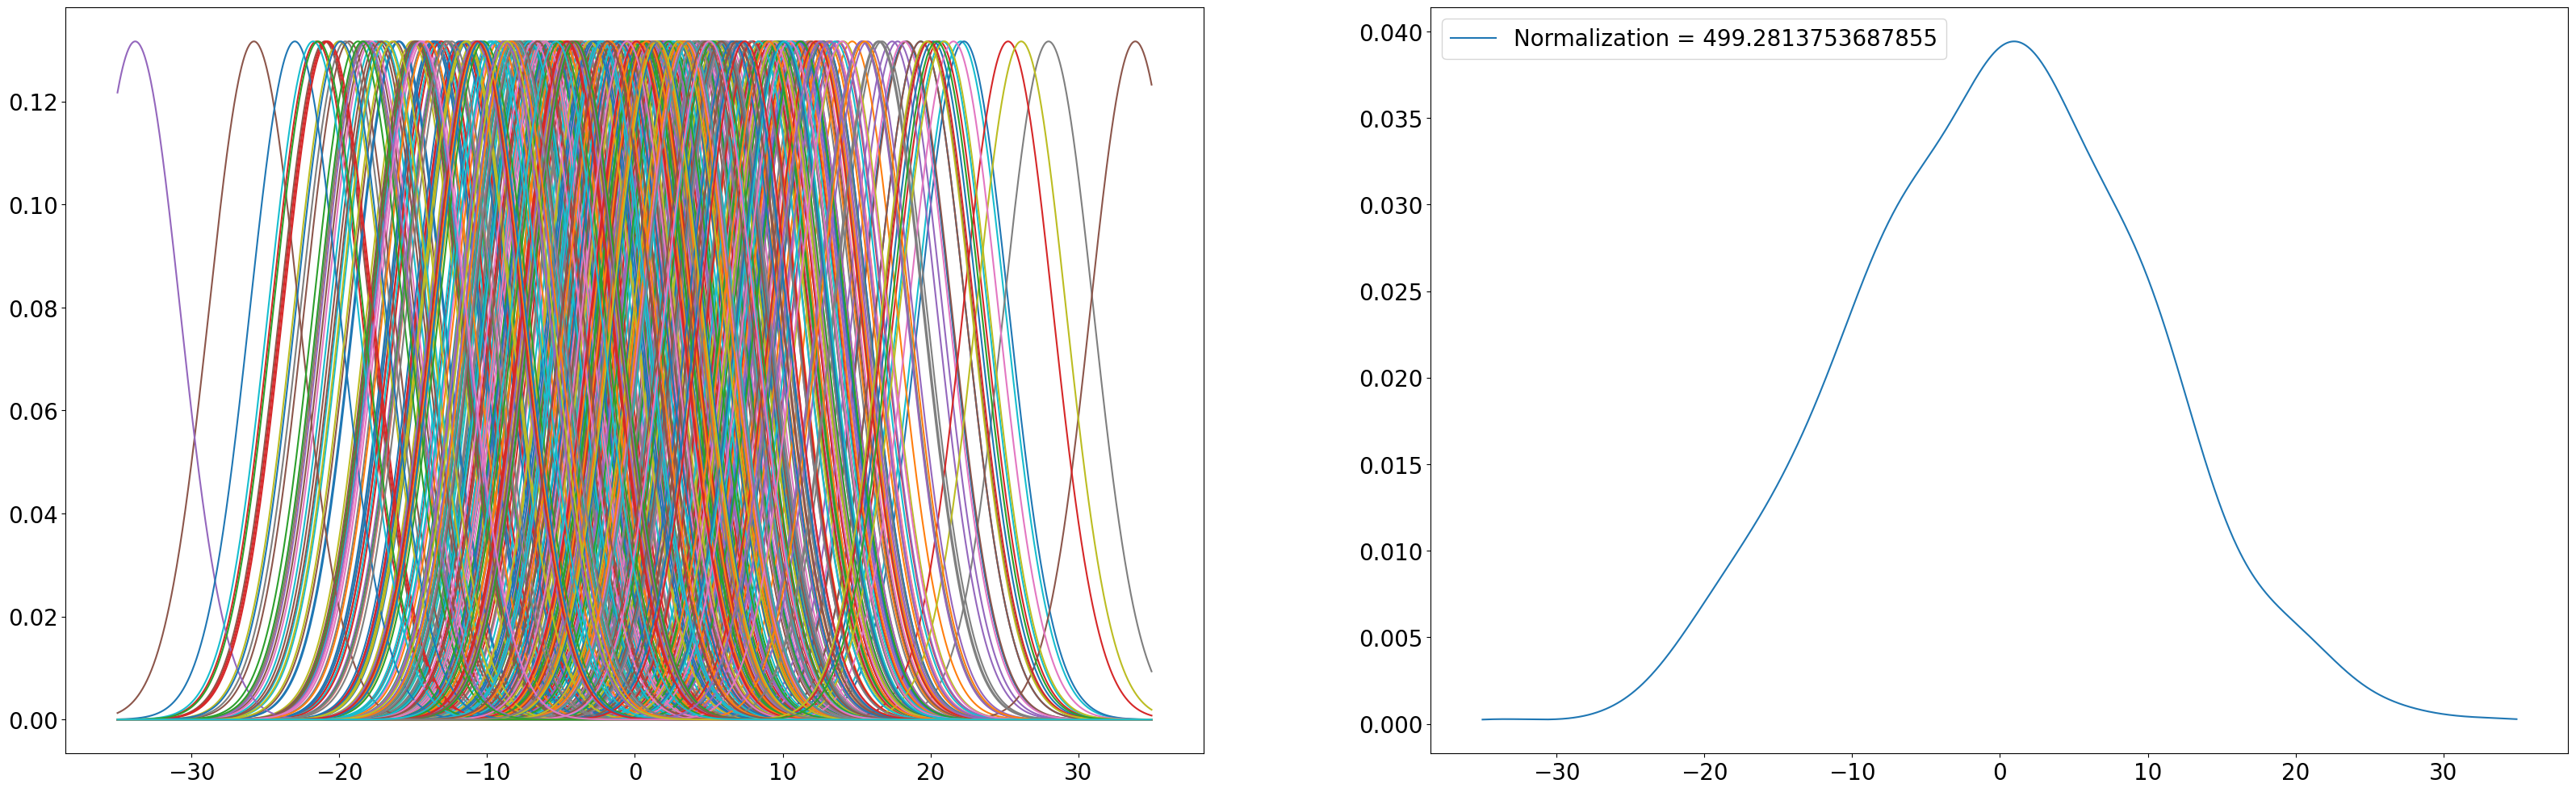

In [403]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(40)
fig.set_figheight(12)
for v in x:
    std = 1.06*x.std()*len(x)**(-1/5)
    axes[0].plot(X, stt.norm.pdf(X, v, std))
axes[0].tick_params(axis='both', which='major', labelsize = 20)

def kde(t, x): #t argument, x array of gaussian-distributed values
    temp = 0
    for v in x:
        std = 1.06*x.std()*len(x)**(-1/5)
        temp += stt.norm.pdf(t, v, std)
    return temp

N = integ.trapezoid(kde(X, x), X)

axes[1].plot(X, kde(X, x)/N, label='Normalization = '+str(N))
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].legend(loc=2, fontsize=20)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2024-12-30 10:40:31--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35 [segue]
--2024-12-30 10:40:32--  https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc8e07c4298be4c7720181c6f880.dl.dropboxusercontent.com/cd/0/inline/ChMe14yTsy3qLwibBBr_31EA3NC01a0vh_X1kyd9WKZW0IiUewlk4gGsqDUNiQDZ-DMwarMfkBEpOWrQ9dMSzjxYeniMJ2GRQpqnwDHkVbzl6XswmQaiPy448oXYlLs8uEg/file# [segue]
--2024-12-30 10:40:32--  https://uc8e07c4298be4c7720181c6f880.dl.

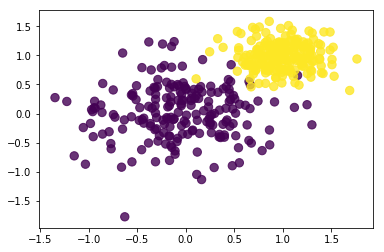

In [277]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

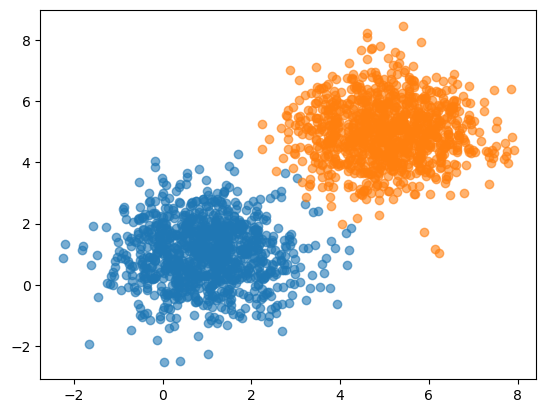

In [306]:
def generate2Dds(center, std, N):
    X = rnd.normal(center[0], std, N)
    Y = rnd.normal(center[1], std, N)
    return (X,Y)

ds1 = generate2Dds((1,1), 1, 1000)
ds2 = generate2Dds((5,5), 1, 1000)

fig, ax = plt.subplots(1)
ax.scatter(ds1[0], ds1[1], alpha=0.6)
ax.scatter(ds2[0], ds2[1], alpha=0.6)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

/var/folders/bq/c0v_5_v15yv4wrwpv0d4mc1r0000gn/T/ipykernel_19938/3480045362.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes.legend()


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


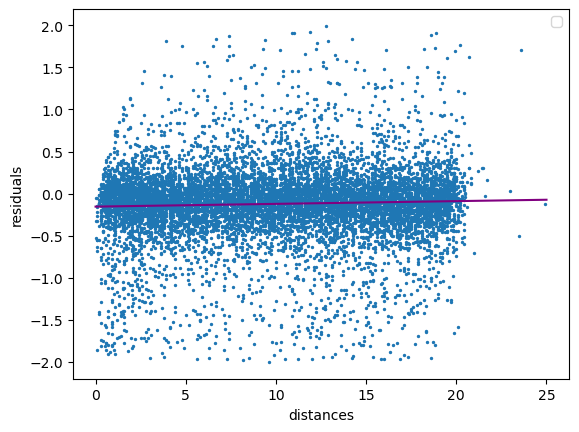

In [340]:
data = np.load('residuals_261.npy', allow_pickle=True)
ds = pd.DataFrame(data.item(0))
clean_ds = ds[np.abs(ds['residuals']) < 2]
result = stt.linregress(clean_ds['distances'], clean_ds['residuals'])
m = result.slope; q = result.intercept
fig, axes = plt.subplots(1)
axes.scatter(clean_ds['distances'], clean_ds['residuals'], s=2)
X = np.linspace(0, 25, 1000)
axes.set_xlabel("distances")
axes.set_ylabel("residuals")
axes.plot(X, X*m + q, c='purple')
axes.legend()
clean_ds

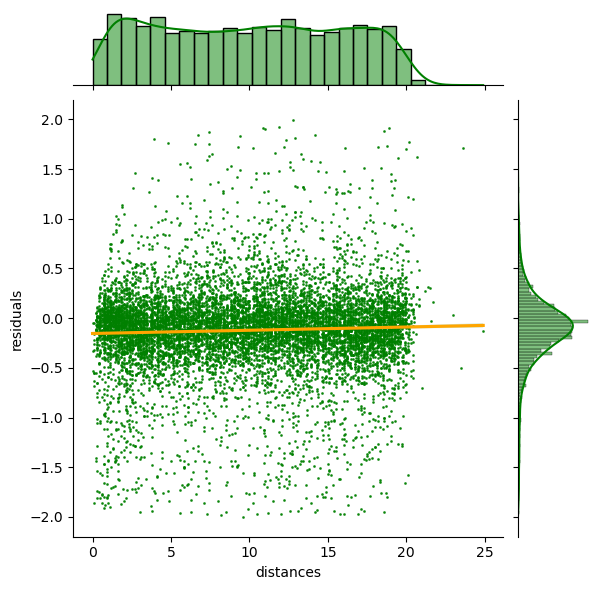

In [339]:
jp = sbn.jointplot(data=clean_ds, x='distances', y='residuals', kind='reg', color='green', scatter_kws={'s': 1})
regline = jp.ax_joint.get_lines()[0]
regline.set_color('orange')

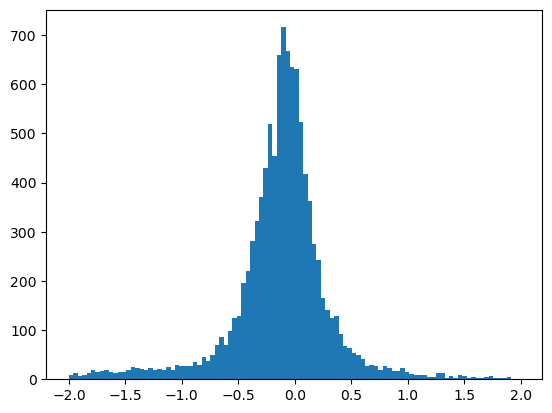

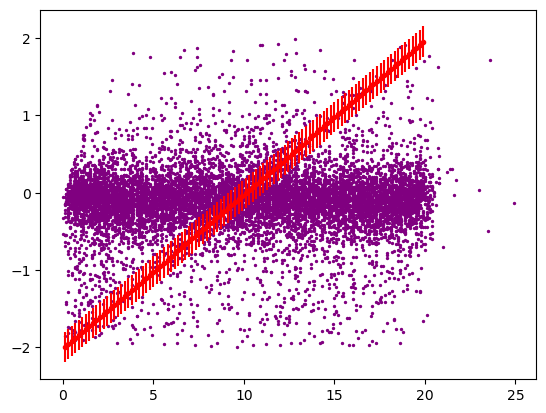

In [365]:
Nbins = int(np.sqrt(len(clean_ds)))
binw = 20/Nbins
x = np.arange(binw/2, 20+binw/2, binw)
histo = plt.hist(clean_ds['residuals'], bins=Nbins)
y = histo[1][0:-1]
erry = binw

fig, axes = plt.subplots(1)
axes.errorbar(x, y, erry, fmt='.', color='red')
axes.scatter(clean_ds['distances'], clean_ds['residuals'], s=2, color ='purple')